# Import Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
#import pydotplus
import graphviz
from statistics import median,mean

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,precision_score,recall_score




In [6]:
from google.colab import files
data_to_load = files.upload()

Saving Copy of bank-full.csv to Copy of bank-full.csv


In [7]:
import io
data = pd.read_csv(io.BytesIO(data_to_load['Copy of bank-full.csv']))

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# EDA

In [10]:
data.shape

(45211, 17)

In [11]:
# Data type of each features

data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

10 features have object type, 7 are numbers

as per given data we know that 10 features are of category type,so lets convert the as a category type

In [12]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]=data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [13]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


# Check the presence of misssing values

In [14]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [15]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [16]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [17]:
data['education'].value_counts()
 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [18]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [19]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [20]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [21]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [22]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [24]:
data['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

### Five Point Summary

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Outliers are present in age,balance,duration,campaign,pdays,previous



Distributions of numerical columns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

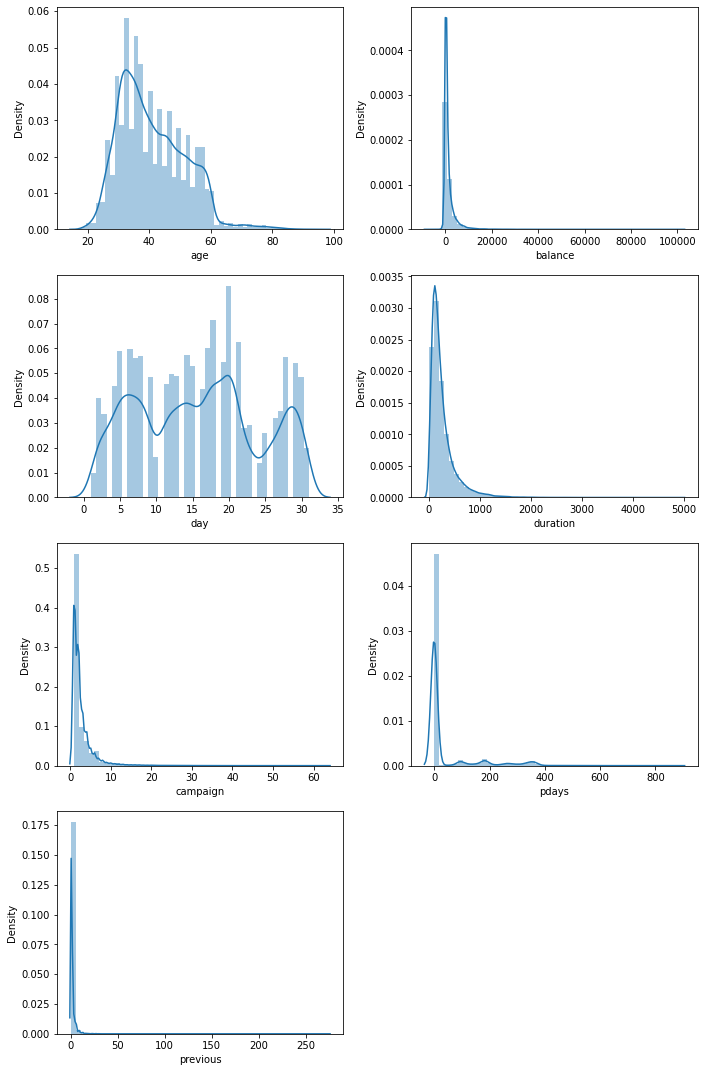

In [26]:
fig, axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.distplot(data['age'],ax=axe[0])
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
sns.distplot(data['pdays'],ax=axe[5])
sns.distplot(data['previous'],ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

## Distributions of categorical feature

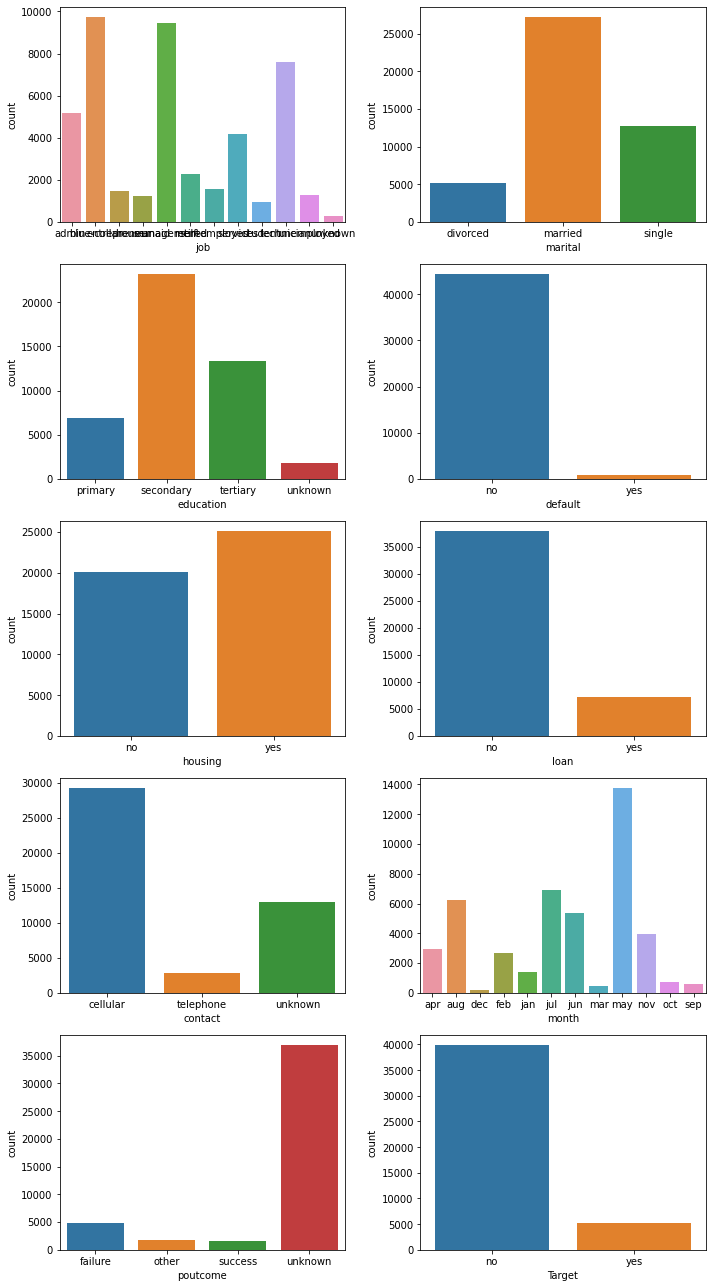

In [27]:
fig, axe=plt.subplots(nrows=5,ncols=2,figsize=(10,18))
axe=axe.flatten()
plot=sns.countplot(x=data['job'],data=data,ax=axe[0])
#plt.setp(plt.get_xticklabels(),rotation=90)

sns.countplot(x=data['marital'],data=data,ax=axe[1])
sns.countplot(x=data['education'],data=data,ax=axe[2])
sns.countplot(x=data['default'],data=data,ax=axe[3])
sns.countplot(x=data['housing'],data=data,ax=axe[4])
sns.countplot(x=data['loan'],data=data,ax=axe[5])
sns.countplot(x=data['contact'],data=data,ax=axe[6])
sns.countplot(x=data['month'],data=data,ax=axe[7])
sns.countplot(x=data['poutcome'],data=data,ax=axe[8])
sns.countplot(x=data['Target'],data=data,ax=axe[9])



fig.tight_layout()
fig.show()


### Inferences from the count plot of categorical feature

1.More than 90% customers have no default credit

2.88% customers have not subscribed for term deposite

3.Most customer have been contacted in the month of May

4.Most of the customers have been contacted by cellular network

5.Number of customers who have housing loan is more than number of customers who dont have housing loan

6.Around 6% customers have credit in default

## Measure of skewness of numerical features

In [28]:
data.skew().to_frame('Skewness Measure')

,Skewness Measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


### Checking the presence of Outliers

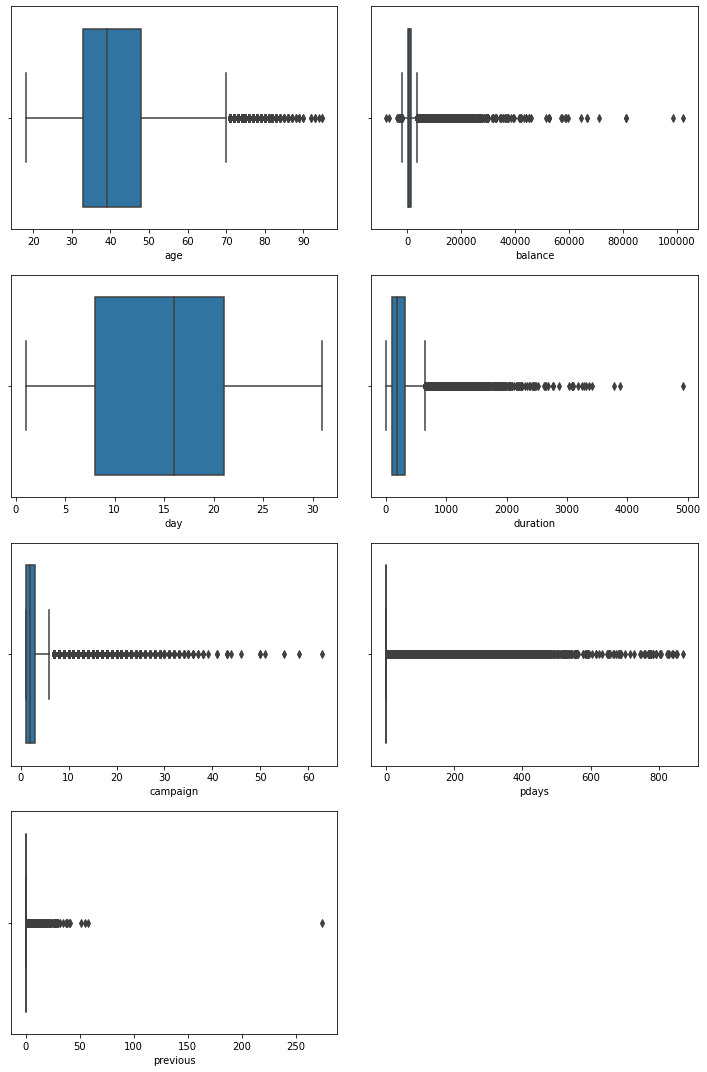

In [29]:
fig, axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()

sns.boxplot(x='age',data=data,ax=axe[0])
sns.boxplot(x='balance',data=data,ax=axe[1])
sns.boxplot(x='day',data=data,ax=axe[2])
sns.boxplot(x='duration',data=data,ax=axe[3])
sns.boxplot(x='campaign',data=data,ax=axe[4])
sns.boxplot(x='pdays',data=data,ax=axe[5])
sns.boxplot(x='previous',data=data,ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

In [30]:
data['Target'].value_counts().to_frame('Target feature distribution')

,Target feature distribution
no,39922
yes,5289


In [31]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [32]:
df=data.copy()
encoder=LabelEncoder()
df['default']=encoder.fit_transform(df['default']).astype(int)
df['marital']=encoder.fit_transform(df['marital']).astype(int)
df['education']=encoder.fit_transform(df['education']).astype(int)
df['housing']=encoder.fit_transform(df['housing']).astype(int)
df['loan']=encoder.fit_transform(df['loan']).astype(int)
df['month']=encoder.fit_transform(df['month']).astype(int)
df['poutcome']=encoder.fit_transform(df['poutcome']).astype(int)
df['Target']=encoder.fit_transform(df['Target']).astype(int)

df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,1,2,1,1,2
education,2,1,1,3,3
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int64   
 3   education  45211 non-null  int64   
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int64   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int64   
 16  Target     45211 non-null  int64   
dtypes: category(2), int64(15)
memory usage: 5.3 MB


In [34]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]=df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


## Handling outliers with mean replacement

In [36]:
meanbal=float(df['balance'].mean())
df['balance']=np.where(df['balance']>np.percentile(df['balance'],75),meanbal,df['balance'])


In [37]:

meandur=float(df['duration'].mean())
df['duration']=np.where(df['duration']>np.percentile(df['duration'],75),meandur,df['duration'])


In [38]:

meancam=float(df['campaign'].mean())
df['campaign']=np.where(df['campaign']>np.percentile(df['campaign'],75),meancam,df['campaign'])


In [39]:
meanpd=float(df['pdays'].mean())
df['pdays']=np.where(df['pdays']>np.percentile(df['pdays'],75),meanpd,df['pdays'])


In [40]:
meanpr=float(df['previous'].mean())
df['previous']=np.where(df['previous']>np.percentile(df['previous'],75),meanpr,df['previous'])


# #After Removing Outliers

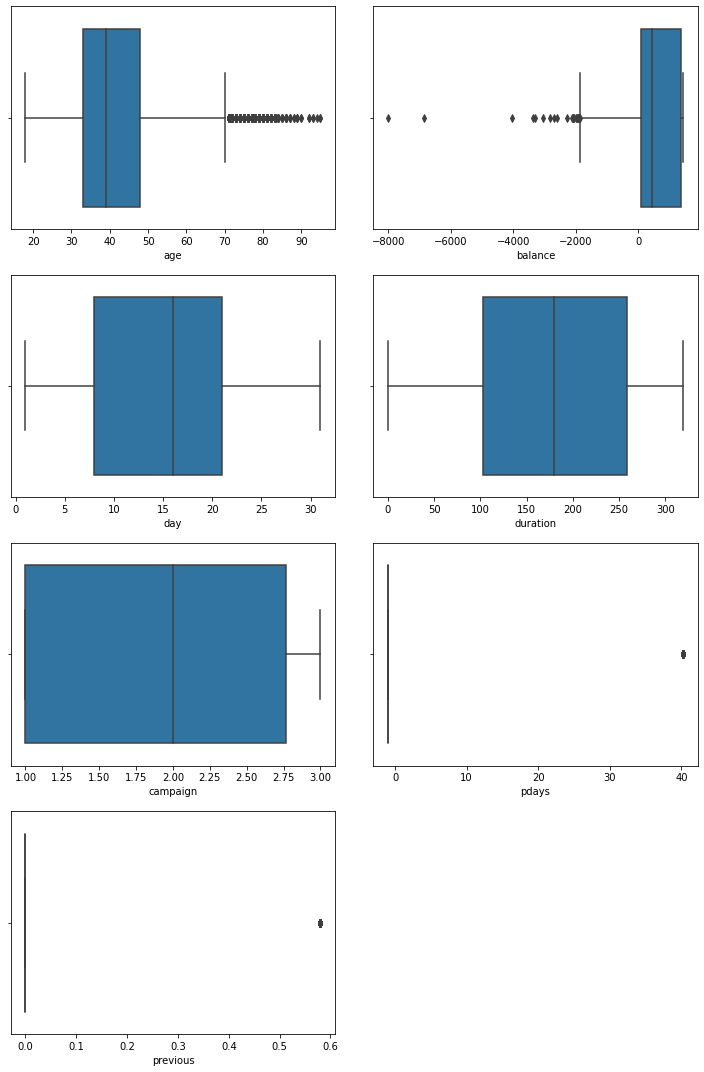

In [41]:
fig, axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()

sns.boxplot(x='age',data=df,ax=axe[0])
sns.boxplot(x='balance',data=df,ax=axe[1])
sns.boxplot(x='day',data=df,ax=axe[2])
sns.boxplot(x='duration',data=df,ax=axe[3])
sns.boxplot(x='campaign',data=df,ax=axe[4])
sns.boxplot(x='pdays',data=df,ax=axe[5])
sns.boxplot(x='previous',data=df,ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

## Corr Plot of all features

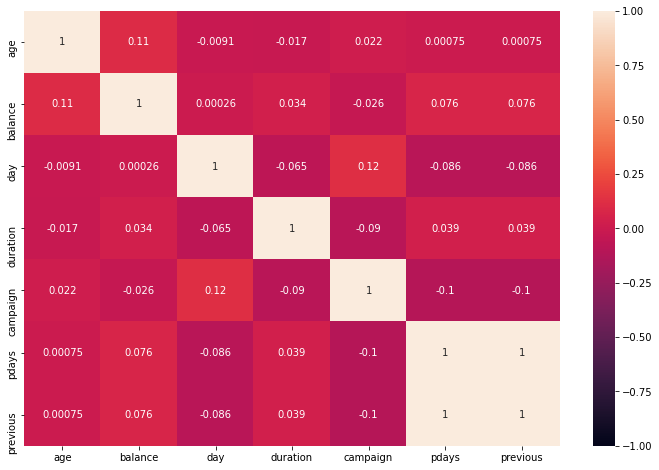

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

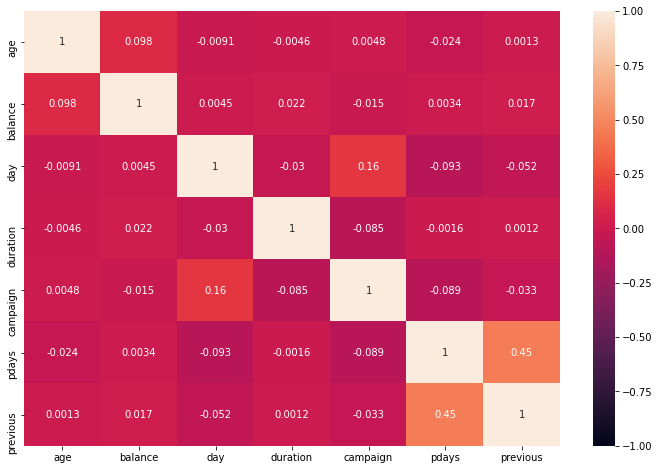

In [43]:
#Before the outliers
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)

In [44]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,1362.272058,1,0,unknown,5,8,261.0,1.0,-1.0,0.0,3,0


In [45]:
df2=df.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


## Split for traning and testing(70:30)

In [46]:
x=df2.drop('Target',axis=1)
y=df2['Target']

In [47]:
x.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome
0,58,1,0,1362.272058,1,0,1.0,0.0,3
1,44,2,0,29.000000,1,0,1.0,0.0,3
2,33,1,0,2.000000,1,1,1.0,0.0,3
3,47,1,0,1362.272058,1,0,1.0,0.0,3
4,33,2,0,1.000000,0,0,1.0,0.0,3


In [48]:
y.head(1)

0    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=2)

## Scaling the data

In [50]:
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.fit_transform(xtest)

# Models

## Logistic Regression Model

In [51]:
logic_r=LogisticRegression(solver='liblinear')
logic_r.fit(xtrain_scaled,ytrain)
y_pred=logic_r.predict(xtest_scaled)
LR_accuracy=accuracy_score(ytest,y_pred)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,y_pred))
print('\nAccuracy score\n',LR_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,y_pred))


Confusion Matrix

 [[11892   107]
 [ 1318   247]]

Accuracy score
 89.49424948392804

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



## Navie Bayes 

In [52]:
NB=GaussianNB()
NB.fit(xtrain_scaled,ytrain)
y_predi=NB.predict(xtest_scaled)
NB_accuracy=accuracy_score(ytest,y_predi)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,y_predi))
print('\nAccuracy score\n',NB_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,y_predi))


Confusion Matrix

 [[10667  1332]
 [ 1055   510]]

Accuracy score
 82.40194632851666

Classification Report

               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11999
           1       0.28      0.33      0.30      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.61      0.60     13564
weighted avg       0.84      0.82      0.83     13564



## KNN Model

In [53]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_scaled,ytrain)
y_predict=knn.predict(xtest_scaled)

KNN_accuracy=accuracy_score(ytest,y_predict)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,y_predict))
print('\nAccuracy score\n',KNN_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,y_predict))


Confusion Matrix

 [[11465   534]
 [ 1236   329]]

Accuracy score
 86.95075199056326

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.38      0.21      0.27      1565

    accuracy                           0.87     13564
   macro avg       0.64      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



## SVC Model

In [54]:
svc=SVC()
svc.fit(xtrain_scaled,ytrain)
y_pred1=svc.predict(xtest_scaled)

svc_accuracy=accuracy_score(ytest,y_pred1)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,y_pred1))
print('\nAccuracy score\n',svc_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,y_pred1))


Confusion Matrix

 [[11856   143]
 [ 1287   278]]

Accuracy score
 89.45738720141551

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.66      0.18      0.28      1565

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



## Decision Tree

In [55]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(xtrain_scaled,ytrain)
dt_pred=dtree.predict(xtest_scaled)

DT_accuracy=accuracy_score(ytest,dt_pred)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,dt_pred))
print('\nAccuracy score\n',DT_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,dt_pred))


Confusion Matrix

 [[10820  1179]
 [ 1184   381]]

Accuracy score
 82.57888528457681

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11999
           1       0.24      0.24      0.24      1565

    accuracy                           0.83     13564
   macro avg       0.57      0.57      0.57     13564
weighted avg       0.83      0.83      0.83     13564



## Bagging Ensemble Model

In [56]:
bagc=BaggingClassifier(base_estimator=dtree,n_estimators=500,random_state=1)
bagc.fit(xtrain_scaled,ytrain)
bag_pred=bagc.predict(xtest_scaled)

BAG_accuracy=accuracy_score(ytest,bag_pred)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,bag_pred))
print('\nAccuracy score\n',BAG_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,bag_pred))


Confusion Matrix

 [[11549   450]
 [ 1231   334]]

Accuracy score
 87.60690061928635

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.21      0.28      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



## Adaptive Boosting Ensemble Model

In [57]:
adab=AdaBoostClassifier(n_estimators=50,random_state=1)
adab.fit(xtrain_scaled,ytrain)
ada_pred=adab.predict(xtest_scaled)

ADA_accuracy=accuracy_score(ytest,ada_pred)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,ada_pred))
print('\nAccuracy score\n',ADA_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,ada_pred))


Confusion Matrix

 [[11885   114]
 [ 1324   241]]

Accuracy score
 89.39840754939546

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.68      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



## RandomForest Ensemble Model

In [58]:
randf=RandomForestClassifier(n_estimators=100,max_features=3)
randf.fit(xtrain_scaled,ytrain)
ran_pred=randf.predict(xtest_scaled)

RAN_accuracy=accuracy_score(ytest,ran_pred)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,ran_pred))
print('\nAccuracy score\n',RAN_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,ran_pred))


Confusion Matrix

 [[11524   475]
 [ 1235   330]]

Accuracy score
 87.39309938071365

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.41      0.21      0.28      1565

    accuracy                           0.87     13564
   macro avg       0.66      0.59      0.60     13564
weighted avg       0.85      0.87      0.86     13564



## Gradient Boosting

In [59]:
grad=GradientBoostingClassifier(n_estimators=100,random_state=2)
grad.fit(xtrain_scaled,ytrain)
grad_pred=randf.predict(xtest_scaled)

GRAD_accuracy=accuracy_score(ytest,grad_pred)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,grad_pred))
print('\nAccuracy score\n',GRAD_accuracy*100)
print('\nClassification Report\n\n',classification_report(ytest,grad_pred))


Confusion Matrix

 [[11524   475]
 [ 1235   330]]

Accuracy score
 87.39309938071365

Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.41      0.21      0.28      1565

    accuracy                           0.87     13564
   macro avg       0.66      0.59      0.60     13564
weighted avg       0.85      0.87      0.86     13564



# Model with Accuracy Scores

In [60]:
scores=[('Navie Bayes',NB_accuracy),
       ('KNN',KNN_accuracy),
        ('Logistic Regression',LR_accuracy),
        ('SVC',svc_accuracy),
        ('Decision Tree',DT_accuracy),
        ('Bagging',BAG_accuracy),
        ('Adaptive Boosting',ADA_accuracy),
        ('Gradient Boosting',GRAD_accuracy),
        ('Random Forest',RAN_accuracy)
       ]

scores=pd.DataFrame(scores,columns=['Model','Accuracy Score'])
print('\n Current scores with outliers replaced with mean:')

scores.sort_values(by='Accuracy Score',ascending=False)
                                    


 Current scores with outliers replaced with mean:


,Model,Accuracy Score
2,Logistic Regression,0.894942
3,SVC,0.894574
6,Adaptive Boosting,0.893984
5,Bagging,0.876069
7,Gradient Boosting,0.873931
8,Random Forest,0.873931
1,KNN,0.869508
4,Decision Tree,0.825789
0,Navie Bayes,0.824019


# Conclusion:
## Comments on dataset:
1. The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit.
2. The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models.   
3. Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge.   
4. Which trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.  
5. This situation could have been avoided if the datset was balanced.   

## Comments on  Models:
1. When benchmarking with 'duration' column, Support Vector Classifier achieved 90% model accuracy while naive bayes score was 85% accurate.
2. SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data.
3. After removing the 'duration' column, The highest model score dropped by 0.5%.
4. The Outliers did not affect much on accuracy scores of all models. As can be seen in above accuracy scores, getting rid of outliers by mean/median replacement did not affect the scores.